Applying Cross-Validation to Random Forest Classifier
Exercise: Implement a random forest classifier and evaluate the model using k-fold cross-validation. Analyze the cross-validation scores to assess model stability.


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score


df = pd.read_csv('adult.csv')

# Drop missing values and rows with '?'
df.replace('?', pd.NA, inplace=True)
df.dropna(inplace=True)


df['income'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)


categorical_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']
numerical_cols = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']


df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


X = df.drop('income', axis=1)
y = df['income']


In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)


cv_scores = cross_val_score(rf_classifier, X, y, cv=5, scoring='accuracy')

# Output cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())
print("Standard Deviation of Cross-Validation Score:", cv_scores.std())


Cross-Validation Scores: [0.84433389 0.84621338 0.85128262 0.85283061 0.85471031]
Mean Cross-Validation Score: 0.8498741586186714
Standard Deviation of Cross-Validation Score: 0.003954961192936651


Investigating Overfitting and Underfitting in Gradient Boosting Machines
Exercise: Train a gradient boosting classifier with varying numbers of estimators and learning rates. Evaluate the model for overfitting and underfitting by comparing training and validation performance.

In [3]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [4]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
train_accuracies = []
val_accuracies = []
n_estimators_options = [50, 100, 150, 200]
learning_rates = [0.01, 0.1, 0.2]

for learning_rate in learning_rates:
    train_accuracies_lr = []
    val_accuracies_lr = []
    for n_estimators in n_estimators_options:
        gb_classifier = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=learning_rate, random_state=42)
        gb_classifier.fit(X_train, y_train)

       
        train_accuracy = accuracy_score(y_train, gb_classifier.predict(X_train))
        val_accuracy = accuracy_score(y_val, gb_classifier.predict(X_val))

        train_accuracies_lr.append(train_accuracy)
        val_accuracies_lr.append(val_accuracy)

    train_accuracies.append(train_accuracies_lr)
    val_accuracies.append(val_accuracies_lr)

# Plot the results
plt.figure(figsize=(14, 6))
for i, learning_rate in enumerate(learning_rates):
    plt.plot(n_estimators_options, train_accuracies[i], label=f'Training LR={learning_rate}')
    plt.plot(n_estimators_options, val_accuracies[i], linestyle='--', label=f'Validation LR={learning_rate}')

plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Gradient Boosting: Train vs Validation Accuracy')
plt.legend()
plt.show()


Evaluating Precision, Recall, and F1-Score for Random Forests
Exercise: Implement a random forest classifier and calculate precision, recall, and F1-score. Discuss the trade-offs between these metrics and their importance for classification tasks.


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score


rf_classifier.fit(X_train, y_train)


y_pred = rf_classifier.predict(X_val)


precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


Precision: 0.73
Recall: 0.62
F1-Score: 0.67


ROC Curve and AUC for Gradient Boosting Classifier
Exercise: Implement a gradient boosting classifier and plot the ROC curve. Compute the AUC and interpret how well the model distinguishes between classes.


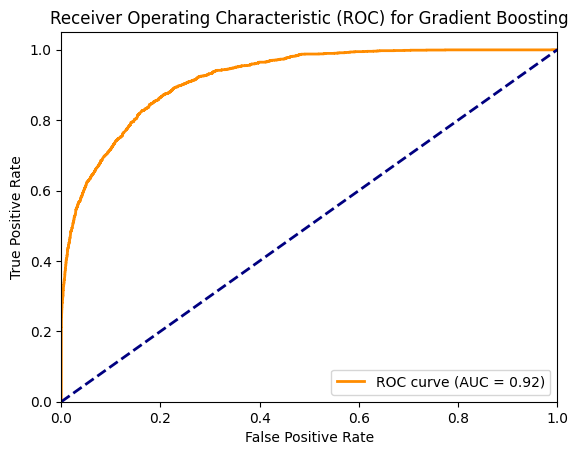

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_classifier.fit(X_train, y_train)


y_prob = gb_classifier.predict_proba(X_test)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)


plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Gradient Boosting')
plt.legend(loc='lower right')
plt.show()


Model Performance Comparison with Different Metrics
Exercise: Compare the performance of different classifiers (e.g., SVM, random forest, gradient boosting) using cross-validation. Evaluate and compare the models based on accuracy, precision, recall, F1-score, and ROC-AUC.


In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.model_selection import cross_val_score


In [ ]:
classifiers = {
    'SVM': SVC(probability=True, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
}

In [ ]:
scoring_metrics = {
    'Accuracy': 'accuracy',
    'Precision': make_scorer(precision_score),
    'Recall': make_scorer(recall_score),
    'F1-Score': make_scorer(f1_score),
    'ROC-AUC': make_scorer(roc_auc_score, needs_proba=True)
}

C:\Users\khali\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_scorer.py:548: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


In [ ]:
results = {}

for name, clf in classifiers.items():
    results[name] = {}
    for metric_name, scoring in scoring_metrics.items():
        cv_score = cross_val_score(clf, X, y, cv=5, scoring=scoring)
        results[name][metric_name] = (cv_score.mean(), cv_score.std())

In [ ]:
for name, scores in results.items():
    print(f"\n{name} Classifier:")
    for metric_name, (mean_score, std_score) in scores.items():
        print(f"  {metric_name}: {mean_score:.2f} ± {std_score:.2f}")
